In [2]:
import numpy as np 
from copy import deepcopy
import matplotlib.pyplot as plt
x = np.array([[1,1]])
y = np.array([[0]])

In [3]:
def feed_forward(inputs, outputs, weights):
  pre_hidden = np.dot(inputs, weights[0])+weights[1]
  out = 1/(1+np.exp(-pre_hidden))
  mean_squared_error = np.mean(np.square(out - outputs))
  return mean_squared_error

In [4]:
def update_weights(inputs, outputs, weights, lr):
  original_weights = deepcopy(weights)
  temp_weights = deepcopy(weights)
  updated_weights = deepcopy(weights)
  original_loss = feed_forward(inputs, outputs, original_weights)
  
  for i, layer in enumerate(original_weights):
    for index, weight in np.ndenumerate(layer):
      temp_weights = deepcopy(weights)
      temp_weights[i][index] += 0.0001
      _loss_plus = feed_forward(inputs, outputs, temp_weights)
      grad = (_loss_plus - original_loss)/(0.0001)
      updated_weights[i][index] -= grad*lr
  
  return updated_weights, original_loss

In [5]:
W = [
np.array([-0.0053, 0.3793], dtype=np.float32).T, np.array([-0.0140], dtype=np.float32),
]

Text(0.5, 1.0, 'Loss over increasing number of epochs')

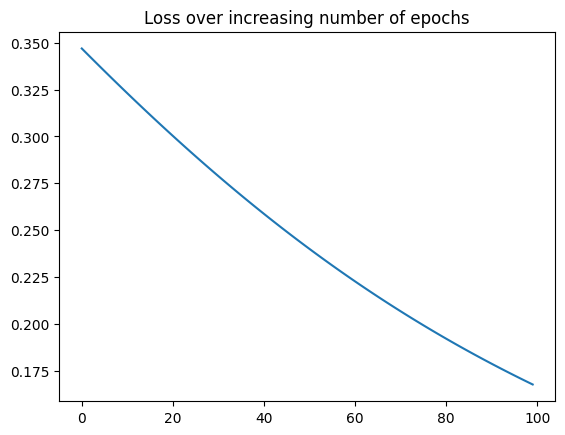

In [6]:
losses = []
for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss)
plt.plot(losses)
plt.title('Loss over increasing number of epochs')

In [7]:
W

[array([-0.24942285,  0.13519615], dtype=float32),
 array([-0.2581218], dtype=float32)]

In [8]:
pre_hidden = np.dot(x, W[0])+W[1]
out = 1/(1+np.exp(-pre_hidden))
print(out)

[0.40797367]
